<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Required-Packages" data-toc-modified-id="Importing-Required-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Required Packages</a></span></li><li><span><a href="#Importing-Dataset" data-toc-modified-id="Importing-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Dataset</a></span></li><li><span><a href="#Preprocessing-Data" data-toc-modified-id="Preprocessing-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing Data</a></span><ul class="toc-item"><li><span><a href="#Handling-Missing-Values" data-toc-modified-id="Handling-Missing-Values-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Handling Missing Values</a></span></li><li><span><a href="#Calculating-Price-Returns" data-toc-modified-id="Calculating-Price-Returns-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Calculating Price Returns</a></span></li><li><span><a href="#Normalized-Prices-and-Returns" data-toc-modified-id="Normalized-Prices-and-Returns-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Normalized Prices and Returns</a></span></li><li><span><a href="#Volatility-(Squared-Returns)" data-toc-modified-id="Volatility-(Squared-Returns)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Volatility (Squared Returns)</a></span></li><li><span><a href="#Exporting-the-Dataframe" data-toc-modified-id="Exporting-the-Dataframe-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Exporting the Dataframe</a></span></li><li><span><a href="#Importing-the-Dataframe" data-toc-modified-id="Importing-the-Dataframe-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Importing the Dataframe</a></span></li></ul></li><li><span><a href="#Preliminary-Data-Visulaizations" data-toc-modified-id="Preliminary-Data-Visulaizations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preliminary Data Visulaizations</a></span></li></ul></div>

# Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn import preprocessing

sns.set()
warnings.filterwarnings("ignore")

Install **yfinance** if needed by un-commenting out this cell.

In [2]:
# !pip install yfinance

In [3]:
import yfinance

# Importing Dataset

The dataset is taken from **yfinance**.

It contains daily data from - **1994-01-07** to **2019-09-01** for the market index - **S&P 500**

In [4]:
raw_data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^GDAXI", start = "1994-01-07", 
                              end = "2019-09-01", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)

[*********************100%***********************]  4 of 4 completed


First few rows of the dataset are as follows.

In [5]:
raw_data.head()

^FTSE                                                \
                   Open         High          Low        Close Volume   
Date                                                                    
1994-01-06  3355.300049  3407.699951  3355.300049  3403.000000    0.0   
1994-01-07  3401.399902  3446.800049  3398.699951  3446.000000    0.0   
1994-01-10  3465.699951  3468.100098  3430.000000  3440.600098    0.0   
1994-01-11  3442.500000  3442.500000  3413.500000  3413.800049    0.0   
1994-01-12  3394.800049  3402.399902  3372.000000  3372.000000    0.0   

                 ^GSPC                                                   \
                  Open        High         Low       Close       Volume   
Date                                                                      
1994-01-06  467.549988  469.000000  467.019989  467.119995  365960000.0   
1994-01-07  467.089996  470.260010  467.029999  469.899994  324920000.0   
1994-01-10  469.899994  475.269989  469.549988  475.269989  319490000.0   
1994-01-11  475.269989  475.279999  473.269989  474.130005  305490000.0   
1994-01-12  474.130005  475.059998  472.140015  474.170013  310690000.0   

                 ^GDAXI                                                \
                   Open         High          Low        Close Volume   
Date                                                                    
1994-01-06  2228.090088  2228.489990  2206.459961  2220.629883    0.0   
1994-01-07  2218.959961  2227.639893  2201.820068  2224.949951    0.0   
1994-01-10  2231.840088  2238.010010  2222.000000  2225.000000    0.0   
1994-01-11  2225.429932  2235.610107  2225.179932  2228.100098    0.0   
1994-01-12  2227.120117  2227.790039  2182.060059  2182.060059    0.0   

                   ^N225                                                   
                    Open          High           Low         Close Volume  
Date                                                                       
1994-01-06           NaN           NaN           NaN           NaN    NaN  
1994-01-07  17842.980469  18131.410156  17787.480469  18124.009766    0.0  
1994-01-10  18186.519531  18567.060547  18186.519531  18443.439453    0.0  
1994-01-11  18481.849609  18671.669922  18373.039062  18485.250000    0.0  
1994-01-12  18447.339844  18807.080078  18301.929688  18793.880859    0.0

Building the final Dataframe from the **closing prices** of **S&P 500** stocks.

In [6]:
# Making a backup dataframe
df_comp = raw_data.copy()

# Adding columns of interest to the new dataframe
df_comp['spx'] = df_comp['^GSPC'].Close[:]

# Final Dataframe
data = df_comp[['spx']]

# Making sure the data follows the periodicity of business days
data = data.asfreq('b')

# Preprocessing Data

First few rows of the working dataframe.

In [7]:
data.head()

,spx
,
Date,
1994-01-06,467.119995
1994-01-07,469.899994
1994-01-10,475.269989
1994-01-11,474.130005
1994-01-12,474.170013


## Handling Missing Values

Statistical description of the dataset

In [8]:
data.describe()

,spx
,
count,6459.000000
mean,1380.614234
std,595.236124
min,438.920013
25%,1023.675018
50%,1263.819946
75%,1562.484985
max,3025.860107


Number of missing values in each column.

In [9]:
data.isnull().sum()

spx      233
dtype: int64

Using **Front Fill (ffill)** method in pandas.

In [10]:
data.spx = data.spx.fillna(method='ffill')

data.isna().sum()

spx      0
dtype: int64

New Statistical Description of the dataset.

In [11]:
data.describe()

,spx
,
count,6692.000000
mean,1380.895551
std,594.732128
min,438.920013
25%,1024.077515
50%,1264.350037
75%,1562.477478
max,3025.860107


## Calculating Price Returns

For each market index the **Returns** at time **t** is defined as follows -

$Returns(t) = \frac{Price(t) - Price(t-1)}{Prices(t-1)} * 100$

In [12]:
data["spx_ret"] = data.spx.pct_change(1).mul(100)

New Dataframe after adding **Returns** for each market index.

In [13]:
data.head()

,spx,spx_ret
,,
Date,,
1994-01-06,467.119995,NaN
1994-01-07,469.899994,0.595136
1994-01-10,475.269989,1.142795
1994-01-11,474.130005,-0.239860
1994-01-12,474.170013,0.008438


## Normalized Prices and Returns

Normalizing the **Price** and **Returns** of each market index.

In [14]:
min_max_scaler = preprocessing.MinMaxScaler()

In [15]:
data["spx_norm"] = min_max_scaler.fit_transform(data.spx.values.reshape((-1, 1)))

data["spx_ret_norm"] = min_max_scaler.fit_transform(data.spx_ret.values.reshape((-1, 1)))

New Dataframe after adding **Normalized Prices** and **Normalized Returns** for each market index.

In [16]:
data.head()

,spx,spx_ret,spx_norm,spx_ret_norm
,,,,
Date,,,,
1994-01-06,467.119995,NaN,0.010901,NaN
1994-01-07,469.899994,0.595136,0.011976,0.467141
1994-01-10,475.269989,1.142795,0.014051,0.493707
1994-01-11,474.130005,-0.239860,0.013611,0.426636
1994-01-12,474.170013,0.008438,0.013626,0.438681


## Volatility (Squared Returns)

Volatility in the returns of a market index are a measure of the stability in the index.

$Volatility(t) = |Returns(t)|$

In [17]:
data["spx_vol"] = data.spx_ret.abs()

data["spx_vol_norm"] = data.spx_ret_norm.abs()

New Dataframe after adding **Volatility** of each market index.

In [18]:
data.head()

,spx,spx_ret,spx_norm,spx_ret_norm,spx_vol,spx_vol_norm
,,,,,,
Date,,,,,,
1994-01-06,467.119995,NaN,0.010901,NaN,NaN,NaN
1994-01-07,469.899994,0.595136,0.011976,0.467141,0.595136,0.467141
1994-01-10,475.269989,1.142795,0.014051,0.493707,1.142795,0.493707
1994-01-11,474.130005,-0.239860,0.013611,0.426636,0.239860,0.426636
1994-01-12,474.170013,0.008438,0.013626,0.438681,0.008438,0.438681


## Exporting the Dataframe

In [19]:
data.reset_index().to_csv("data.csv", index = False)
pd.read_csv("data.csv")[1:].to_csv("data.csv", index = False)

## Importing the Dataframe

In [20]:
data = pd.read_csv("data.csv")
data.Date = pd.to_datetime(data.Date)
data.set_index("Date", inplace = True)

# Preliminary Data Visulaizations

In [21]:
data.head()

,spx,spx_ret,spx_norm,spx_ret_norm,spx_vol,spx_vol_norm
Date,,,,,,
1994-01-06,467.119995,NaN,0.010901,NaN,NaN,NaN
1994-01-07,469.899994,0.595136,0.011976,0.467141,0.595136,0.467141
1994-01-10,475.269989,1.142795,0.014051,0.493707,1.142795,0.493707
1994-01-11,474.130005,-0.239860,0.013611,0.426636,0.239860,0.426636
1994-01-12,474.170013,0.008438,0.013626,0.438681,0.008438,0.438681


The following line plots shows the trend of all columns of the dataframe above.

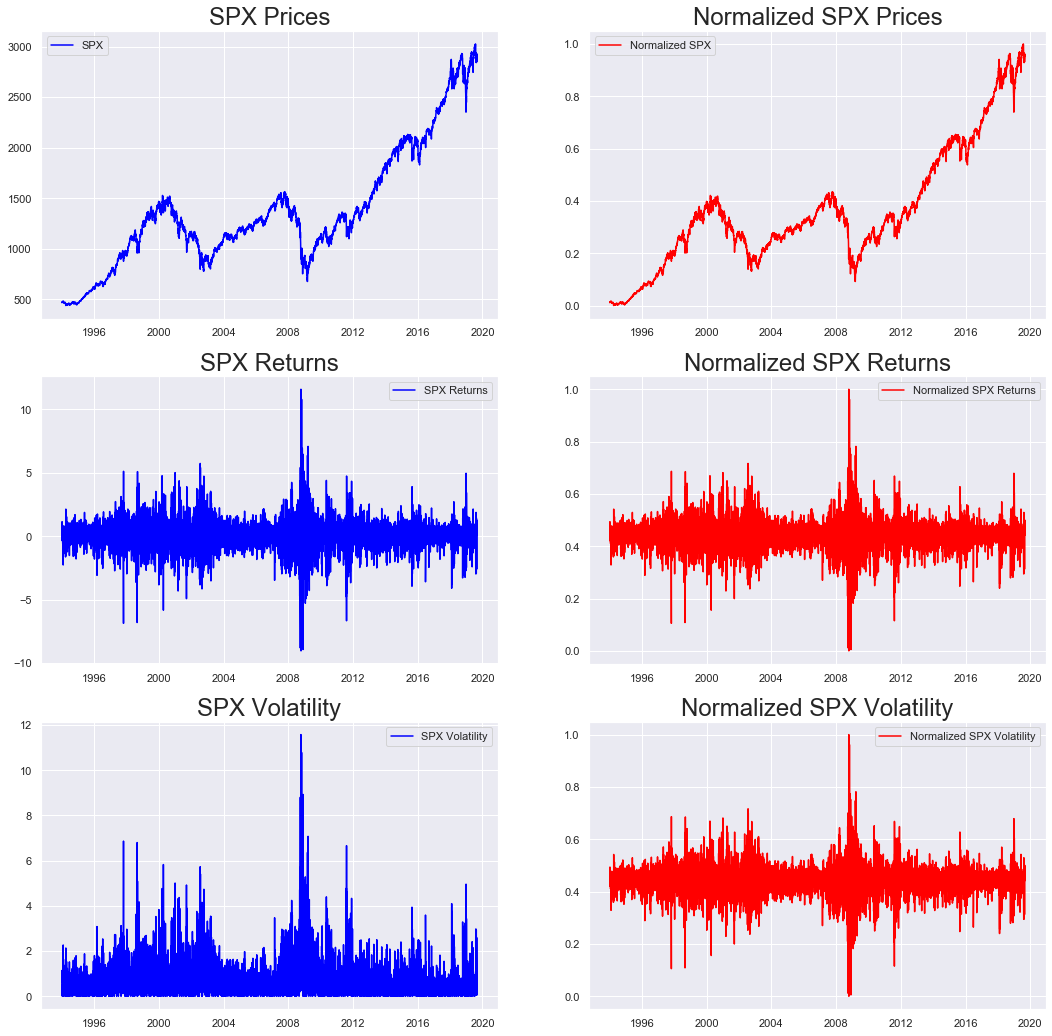

In [22]:
plt.rcParams["figure.figsize"] = (18, 18)

fig, ax = plt.subplots(3, 2)

ax[0, 0].plot(data.spx, color = "blue", label = "SPX")
ax[0, 0].set_title("SPX Prices", size = 24)
ax[0, 0].legend()

ax[0, 1].plot(data.spx_norm, color = "red", label = "Normalized SPX")
ax[0, 1].set_title("Normalized SPX Prices", size = 24)
ax[0, 1].legend()

ax[1, 0].plot(data.spx_ret, color = "blue", label = "SPX Returns")
ax[1, 0].set_title("SPX Returns", size = 24)
ax[1, 0].legend()

ax[1, 1].plot(data.spx_ret_norm, color = "red", label = "Normalized SPX Returns")
ax[1, 1].set_title("Normalized SPX Returns", size = 24)
ax[1, 1].legend()

ax[2, 0].plot(data.spx_vol, color = "blue", label = "SPX Volatility")
ax[2, 0].set_title("SPX Volatility", size = 24)
ax[2, 0].legend()

ax[2, 1].plot(data.spx_vol_norm, color = "red", label = "Normalized SPX Volatility")
ax[2, 1].set_title("Normalized SPX Volatility", size = 24)
ax[2, 1].legend()

plt.show()